# TP 2 : R√©solution et comportement de syst√®mes diff√©rentiels lin√©aires

L'objectif du TP est de vous apprendre √† resoudre explicitement des EDO lin√©aires en dimension plus grand que 1.

In [3]:
import numpy as np # donne acces a la librairie numpy, et definit l'abbreviation np
import scipy        # donne acces aux librairies scipy, scipy.linalg et scipy.integrate
import scipy.linalg
import scipy.integrate
import matplotlib.pyplot as plt # donne acces a la librairie matplotlib.pyplot, et definit l'abbreviation plt
import math     # donne acces aux fonctions et constantes mathematiques
from mpl_toolkits.mplot3d import Axes3D  # tracer la figure en 3D
%matplotlib inline    
# ouvre les fenetres graphiques dans le notebook


## Exercice 1  Syst√®me diff√©rentiel lin√©aire  √† coefficients constants

En TD on a d√©termin√©  la solution du
probl√®me 
\begin{equation*}
\left\{
\begin{array}{ll}
y'=Ay,\\
y(0)=y_0,
\end{array}
\right.
\end{equation*}
avec $\displaystyle A=
\begin{pmatrix}
-1 & 4\\ 1 & -1
\end{pmatrix}$, 
$\begin{pmatrix}
0 & -1 \\1 & 0
\end{pmatrix}$, 
$\begin{pmatrix}
2 & 1 \\ 0 & 2
\end{pmatrix},$
pour $y_0\in R^2$ quelconque donn√©, sous la forme $$y(t)=e^{At}y_0.$$
On va maintenant calculer puis visualiser ces solutions

### Question 1 : d√©finir une matrice dans python

Supposons que pour une matrice $A$ et un vecteur $Z_0$ donn√©s, on veuille calculer la fonction vectorielle $Z(t)=e^{At}Z_0$. On peut soit passer par la diagonalisation $A=MDM^{-1}$ et calculer 
$Z(t)=Me^{Dt}M^{-1}Z_0$, soit laisser python faire tout le travail et lui laisser calculer √† chaque temps la matrice $e^{At}$.

In [4]:
#Diagonalisation de la matrice
a_11,a_12, a_21, a_22=-1,4,1,-1
y_1,y_2=1.,2
A =np.matrix([[a_11,a_12], [a_21, a_22]]) 
y0=np.array([y_1,y_2])


w,v=scipy.linalg.eig(A) # calcule les valeurs propres dans w et les vecteurs propres dans v
mv=np.matrix(v) # matrice de passage
imv=scipy.linalg.inv(mv) #inverse de la matrice de passage
D=np.matrix(np.diag(w)) # fabrique une matrice diagonale avec w sur la diagonale
M=np.matrix(v)
print ("diagonalisation de la matrice" , M*D*scipy.linalg.inv(M), A)

#Calcul de l'exponentielle de la matrice
eA=scipy.linalg.expm(A)
eD=np.matrix(np.diag(np.exp(w)))
eeA=np.matrix(v)*eD*scipy.linalg.inv(np.matrix(v))
print ("calcul de l'exponentielle de matrice avec la fonction scipy={}".format(eA))
print ("calcul de l'exponentielle de matrice a la main={}".format(eeA))


diagonalisation de la matrice [[-1.+0.j  4.+0.j]
 [ 1.+0.j -1.+0.j]] [[-1  4]
 [ 1 -1]]
calcul de l'exponentielle de matrice avec la fonction scipy=[[1.38403445 2.66849476]
 [0.66712369 1.38403445]]
calcul de l'exponentielle de matrice a la main=[[1.38403445+0.j 2.66849476+0.j]
 [0.66712369+0.j 1.38403445+0.j]]


In [5]:
nbp=20
t_0=0
t_1=1
t_=np.linspace(t_0,t_1,nbp)


Text(0,0.5,'$y_2$')

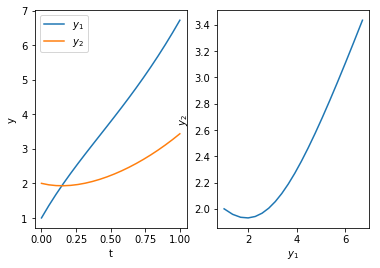

In [6]:
y_=np.zeros((nbp,2))
for k in range(nbp):
    y_[k,:]=scipy.linalg.expm(A*t_[k]).dot(y0).reshape(1,2)
plt.subplot(1,2,1)
plt.plot(t_,y_[:,0],label=r'$y_1$')
plt.plot(t_,y_[:,1],label=r'$y_2$')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.subplot(1,2,2)
plt.plot(y_[:,0],y_[:,1])
plt.xlabel(r'$y_1$')
plt.ylabel(r'$y_2$')


valeurs propres de la matrice [0.+1.j 0.-1.j]


Text(0,0.5,'$y_2$')

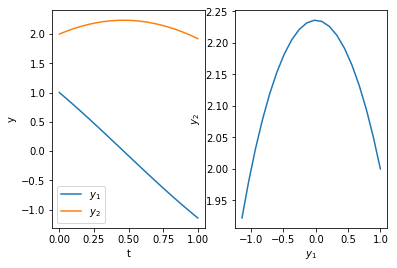

In [13]:
a_11,a_12, a_21, a_22=0,-1,1,0
y_1,y_2=1.,2
A =np.matrix([[a_11,a_12], [a_21, a_22]]) 
w,v=scipy.linalg.eig(A) # calcule les valeurs propres dans w et les vecteurs propres dans v
print ("valeurs propres de la matrice" ,w)
y0 =np.matrix([[y_1],[y_2]]) 
y_=np.zeros((nbp,2))
for k in range(nbp):
    y_[k,:]=scipy.linalg.expm(A*t_[k]).dot(y0).reshape(1,2)
plt.subplot(1,2,1)
plt.plot(t_,y_[:,0],label=r'$y_1$')
plt.plot(t_,y_[:,1],label=r'$y_2$')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.subplot(1,2,2)
plt.plot(y_[:,0],y_[:,1])
plt.xlabel(r'$y_1$')
plt.ylabel(r'$y_2$')


valeurs propres de la matrice [2.+0.j 2.+0.j]


Text(0,0.5,'$y_2$')

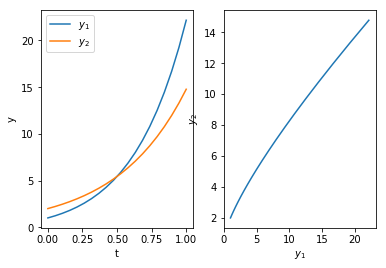

In [7]:
a_11,a_12, a_21, a_22=2,1,0,2
y_1,y_2=1.,2
A =np.matrix([[a_11,a_12], [a_21, a_22]]) 
w,v=scipy.linalg.eig(A) # calcule les valeurs propres dans w et les vecteurs propres dans v
print ("valeurs propres de la matrice" ,w)

y0 =np.matrix([[y_1],[y_2]]) 
y_=np.zeros((nbp,2))
for k in range(nbp):
    y_[k,:]=scipy.linalg.expm(A*t_[k]).dot(y0).reshape(1,2)
plt.subplot(1,2,1)
plt.plot(t_,y_[:,0],label=r'$y_1$')
plt.plot(t_,y_[:,1],label=r'$y_2$')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.subplot(1,2,2)
plt.plot(y_[:,0],y_[:,1])
plt.xlabel(r'$y_1$')
plt.ylabel(r'$y_2$')


## Exercice 2 -  Oscillateur amorti et forc√©

On rappelle l'√©quation de l‚Äôoscillateur harmonique, de fr√©quence $\omega/(2\pi)$ et
d‚Äôamplitude $K$
$$\left\{\begin{array}{l}x''(t) + cx'(t) + \omega_0^2x(t)=K\cos(\omega t)\\
 x(0) = x_0 \\
 x'(0) = v_0
 \end{array}\right.
 $$
avec $c>0$.

L'√©quation diff√©rentielle du second ordre se transforme en un syst√®me diff√©rentiel d'ordre un
$$ \left\{\begin{array}{l}X'(t)=AX(t)+b(t)\\
X(0)=X_0 \end{array}\right.
$$
avec
$$X(t)=\begin{pmatrix} x(t)\\x'(t)\end{pmatrix},\quad X_0=\begin{pmatrix} x_0\\v_0\end{pmatrix}\quad A=\begin{pmatrix} 0 & 1\\ -\omega_0^2 & -c\end{pmatrix}\quad b(t)=\begin{pmatrix} 0\\K\cos(\omega t)\end{pmatrix}$$


### Premi√®re partie - cas homog√®ne

On commence par √©tudier le syst√®me homog√®ne 
$$\left\{\begin{array}{l}x''(t) + cx'(t) + \omega_0^2x(t)=0\\
 x(0) = x_0 \\
 x'(0) = v_0
 \end{array}\right.
 $$
On rappelle le champ de vecteur du syst√®me homog√®ne associ√© $$X'(t)=AX(t).$$
Le code ci-dessous est un exemple pour vous montrer comment tracer le champ de vecteur.

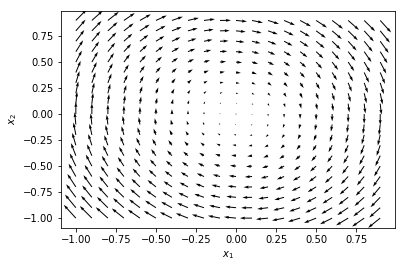

In [10]:
# Fixer les parametres
c        = .1
omega_0  = 1
w2       = omega_0**2

# Discr√©tiser les deux variables
x1min    = -1
x1max    = 1
dx1      = 0.1
x1       = np.arange(x1min,x1max,dx1)
x2min    = -1.
x2max    = 1
dx2      = 0.1
x2=np.arange(x2min,x2max,dx2)

# Calculer le champ de vecteur
XX1,XX2  = np.meshgrid(x1, x2)
U        = XX2
V        = -w2*XX1-c*XX2

# Plot la figure
plt.quiver(XX1,XX2,U,V)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

La solution de l'√©quation homog√®ne se calcule gr√¢ce √† l'exponentielle de matrice (d√©j√† vu au TP pr√©c√©dent)
Dans la cellule suivante on superpose le champ de vecteur et les trajectoires.

valeurs propres de la matrice [-0.05+0.99874922j -0.05-0.99874922j]


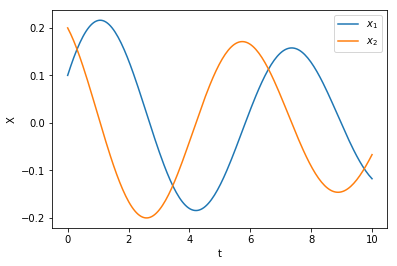

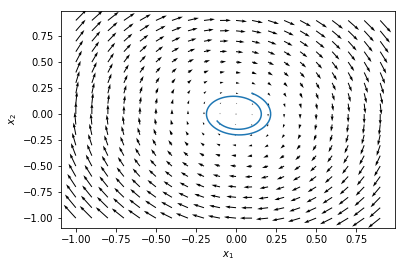

In [16]:
# Discr√©tiser l'intervalle t
nbp     = 200
t_0     = 0
t_1     = 10
t_      = np.linspace(t_0,t_1,nbp)

# condition initiale
x_0,v_0 = .1,.2
X0      = np.matrix([[x_0],[v_0]]) 

# la matrice A
A       = np.matrix([[0,1], [-w2, -c]]) 

# calcule les valeurs propres dans w et les vecteurs propres dans v
w,v     = scipy.linalg.eig(A) 
print ("valeurs propres de la matrice" ,w)

# Evaluer les valeurs du X √† chaque l'instant t
X_      = np.zeros((nbp,2))
for k in range(nbp):
    X_[k,:]=scipy.linalg.expm(A*t_[k]).dot(X0).reshape(1,2)
    
# Plot les figures    
plt.figure(1)
plt.plot(t_,X_[:,0],label=r'$x_1$')
plt.plot(t_,X_[:,1],label=r'$x_2$')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.quiver(XX1,XX2,U,V)
plt.plot(X_[:,0],X_[:,1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

Question : modifier (un peu) le code ci-dessus pour mettre en √©vidence le comportement en temps long / asymptotique de la solution.

R√©ponse : on refait tourner le code ci-dessus en multipliant nbp et t_1 par 10 (ou 100). On voit clairement la convergence en temps long vers le point stationnaire (0,0) dans l'espace des phases.

valeurs propres de la matrice [-0.05+0.99874922j -0.05-0.99874922j]


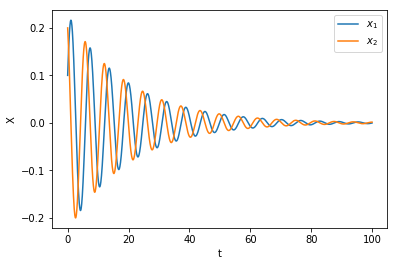

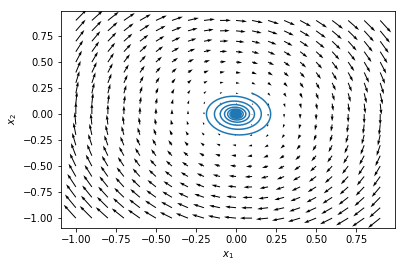

In [17]:
# Discr√©tiser l'intervalle t
nbp     = 2000
t_0     = 0
t_1     = 100
t_      = np.linspace(t_0,t_1,nbp)

# condition initiale
x_0,v_0 = .1,.2
X0      = np.matrix([[x_0],[v_0]]) 

# la matrice A
A       = np.matrix([[0,1], [-w2, -c]]) 

# calcule les valeurs propres dans w et les vecteurs propres dans v
w,v     = scipy.linalg.eig(A) 
print ("valeurs propres de la matrice" ,w)

# Evaluer les valeurs du X √† chaque l'instant t
X_      = np.zeros((nbp,2))
for k in range(nbp):
    X_[k,:]=scipy.linalg.expm(A*t_[k]).dot(X0).reshape(1,2)
    
# Plot les figures    
plt.figure(1)
plt.plot(t_,X_[:,0],label=r'$x_1$')
plt.plot(t_,X_[:,1],label=r'$x_2$')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.quiver(XX1,XX2,U,V)
plt.plot(X_[:,0],X_[:,1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

Si on augmente la dur√©e de la simulation on voit que la solution tend vers 0 quand t devient grand, le point (0,0) est un point d'√©quilibre asymptotiquement stable.

### Deuxi√®me Partie - Avec le second membre

Une solution particuli√®re de l'EDO se cherche sous la forme $$x_p(t)=a_p\cos(\omega t)+b_p\sin(\omega t).$$
Tous calculs faits (√† faire √† titre d'exercice), on trouve
$$   a_p=\frac{\alpha K}{\alpha^2+(c\omega)^2},\quad
    b_p=\frac{c\omega K}{\alpha^2+(c\omega)^2},\quad\mbox{avec }\alpha= \omega_0^2-\omega^2 $$
La solution particuli√®re s'acrit sous forme vectorielle $$X_p(t)=\begin{pmatrix}x_p(t)\cr x_p'(t) \end{pmatrix}=\begin{pmatrix}a_p& b_p\cr b_p\omega&-a_p\omega \end{pmatrix}\begin{pmatrix}\cos(\omega t)\cr \sin(\omega t) \end{pmatrix}$$
La solution a la forme g√©n√©rale  $$ X(t)=X_p(t)+e^{At}\bar X,$$ dans laquelle on d√©termine $\bar X$ pour que $X(0)=X_0$, c'est-√†-dire
$$\bar X=X_0-X_p(0)=\begin{pmatrix}x_0-a_p\cr v_0 -b_p\omega\end{pmatrix}$$


#### Question 1
Ecrire une fonction oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K) qui calcule la solution aux temps du vecteur t_.

In [20]:
def oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K):
    alpha = omega_0**2 - omega**2
    ap = alpha*K/(alpha**2+(c*omega)**2)
    bp = c*omega*K/(alpha**2+(c*omega)**2)
    
    A  = np.matrix([[0,1],[-omega_0**2,-c]])
    X_ = np.matrix([[x_0-ap],[v_0-bp*omega]])
    
    x_=[]
    v_=[]
    
    for t in t_:
        eA = scipy.linalg.expm(A*t)
        X = eA*X_
        x_.append(float(np.real(X[0][0]))+ap*math.cos(omega*t)+bp*math.sin(omega*t))
        v_.append(float(np.real(X[1][0]))+bp*omega*math.cos(omega*t)-ap*omega*math.sin(omega*t))
    return x_,v_

Tester la fonction pour $c=0.1$, $K=\omega=0$ pour retrouver les r√©sultats du cas pr√©c√©dent

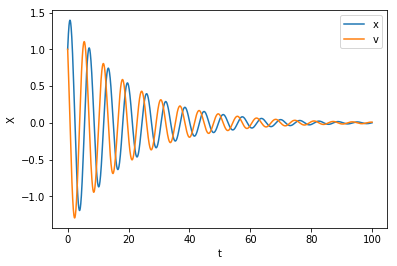

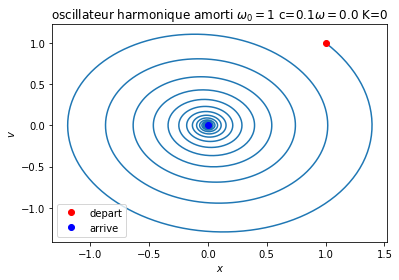

In [25]:
# Fixer les parametres
t_      = np.linspace(0,100,2000)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = .1
K       = 0
omega   = 0.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrive')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

V√©rifiez en tra√ßant le portrait de phase que vous retrouvez bien les diff√©rents comportements d√©crits dans le polycopi√©.

#### Question 2: cas avec excitation et frottement
V√©rifier votre fonction avec $x_0=1$, $v_0=1$, $\omega_0=1$, $c=0.1$, $K=2$ et $\omega=5$. C'est aussi le cas avec
excitation et frottement(i.e $K>0$ et $c>0$).

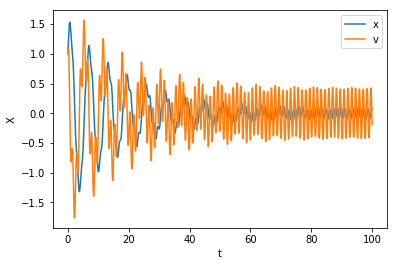

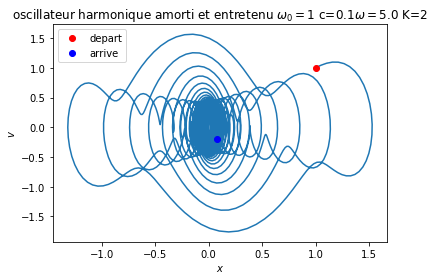

In [27]:
# Fixer les parametres
t_      = np.linspace(0,100,2000)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = .1
K       = 2
omega   = 5.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrive')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti et entretenu $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

#### Questions 3: cas sans excitation et sans frottement 
Reprenez votre fonction avec $K = 0$ et $c = 0$, tout le reste ne change pas, tracer le portait de phase et les valeurs de x_ et t_ en fonction de $t$. On rappelle que la solution dans ce cas l√† est de la forme
$$ x(t) = x_0cos(\omega_0t)+\frac{v_0}{\omega_0}sin(\omega_0t)$$

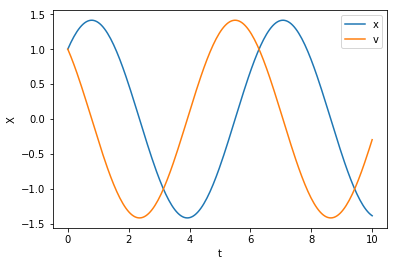

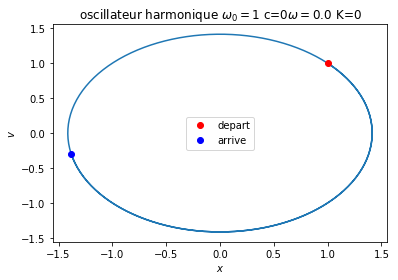

In [28]:
# Fixer les parametres
t_      = np.linspace(0,10,200)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = 0
K       = 0
omega   = 0.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrive')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

#### Question 4: cas sans excitation et avec frottement
Trois cas possibles suivant la nature des racines de l‚Äô√©quation caract√©ristique $$\lambda^2 + c\lambda + \omega_0^2 = 0$$
Ici on remarque bien que $K=0$ et $c>0$

##### Question : cas $\lambda_1 \neq \lambda_2 \in \mathbb{R}$
Prenons par exemple $c = 3$, $\omega_0 = 1$,$x_0=1$, $v_0=1$ et $\omega=5$.
On voit que dans ce cas la solution tend vers le point stationnaire $(0.,0)$ dans l'espace des phases

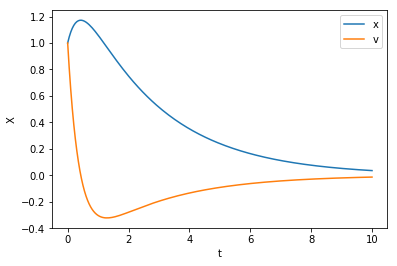

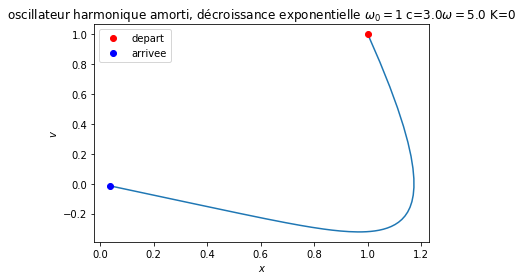

In [33]:
# Fixer les parametres
t_      = np.linspace(0,10,200)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = 3.
K       = 0
omega   = 5.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrivee')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti, d√©croissance exponentielle $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

##### Question : cas $\lambda_1 \neq \lambda_2 \in \mathbb{C}$
Prenons par exemple $c = 1$, $\omega_0 = 1$,$x_0=1$, $v_0=1$ et $\omega=5$.
L√† encore la solution tend vers le point stationnaire, mais en oscillant.

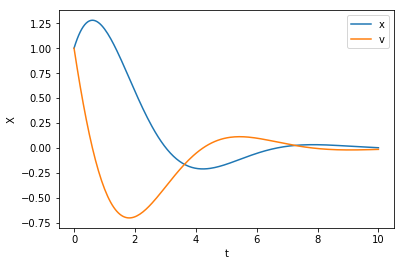

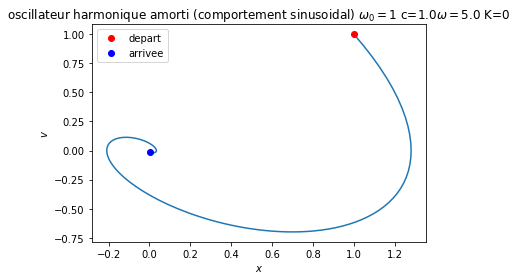

In [34]:
# Fixer les parametres
t_      = np.linspace(0,10,200)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = 1.
K       = 0
omega   = 5.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrivee')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti (comportement sinusoidal) $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

##### Question : cas $\lambda_1 = \lambda_2$
Prenons par exemple $c = 2$, $\omega_0 = 1$,$x_0=1$, $v_0=1$ et $\omega=5$.
La solution ne se distingue pas qualitativement du premier cas, bien qu'elle contienne maintenant un terme polynomial en facteur de l'exponentielle.

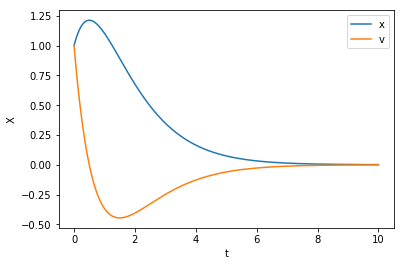

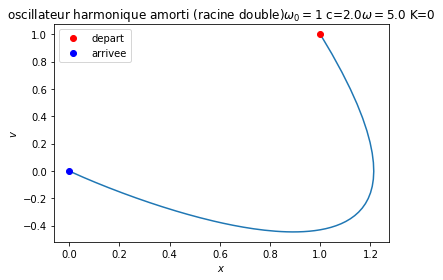

In [38]:
# Fixer les parametres
t_      = np.linspace(0,10,200)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = 2.
K       = 0
omega   = 5.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrivee')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti (racine double)$\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

#### Question 5: cas r√©sonance avec frottement
Visualiser la solution pour ùëê=1, ùúî0=1,ùë•0=1, ùë£0=1,  K=1 et ùúî=ùúî0

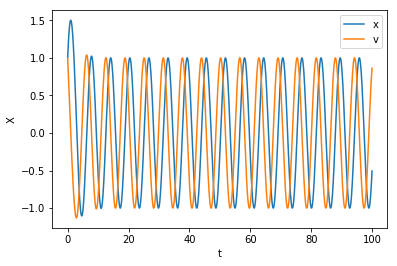

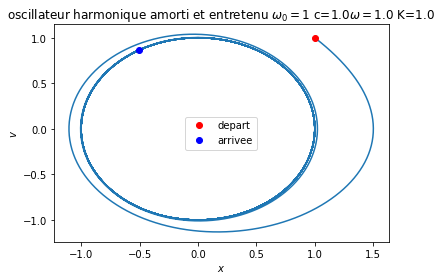

In [39]:
# Fixer les parametres
t_      = np.linspace(0,100,2000)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = 1.
K       = 1.
omega   = 1.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrivee')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti et entretenu avec la fr√©quence propre $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

Dans ce r√©gime, comme dans le cas $\omega\neq \omega_0$ d'ailleurs, au bout d'un certain temps le mouvement propre de l'oscillateur disparait √† cause de l'at√©nuation, s'il n'y avait pas l'excitation ext√©rieure il serait revenu √† l'√©quilibre. Il ne reste donc plus que la composante p√©riodique due √† excitation ext√©rieure.

#### Question 6: cas r√©sonance sans frottement
Dans le cas o√π il y a une r√©sonnance sans frottement, on sait d'apr√®s le poly que la solution est de la forme 
$$x(t)=(at+b)\sin(\omega t)+(dt+e)\cos(\omega t)$$
Les constantes $a$, $b$, $d$ et $e$ se d√©terminent en injectant cette solution dans le probl√®me de Cauchy.<br>
L'EDO donne $$2 a \omega\cos(\omega t)-2d\omega\sin(\omega t)=K\cos(\omega t)$$
d'o√π $d=0$ et $a=\frac{K}{2\omega}$.<br>
Les conditions initiales donnent
$e=x_0$ et $b\omega=v_0$ d'o√π finalement
$$x(t)=\frac{Kt+v_0}{2\omega}\sin(\omega t)+x_0\cos(\omega t).$$
Programmer le calcul dans la fonction ci-dessous . Visualiser la solution pour $c=0$, $\omega_0=1$,$x_0=1$, $v_0=1$ et $\omega=\omega_0$.

In [49]:
def resonnance(t,omega,x0,v0,K):
    x=(K*t+2*v0)*math.sin(omega*t)/(2*omega)+x0*math.cos(omega*t)  #completer
    v=(K/(2*omega)-x0*omega)*math.sin(omega*t)+(K*t+2*v0)*math.cos(omega*t)/2
    return x,v

On v√©rifie que l'amplitude de la solution dans l'espace des phases cro√Æt lin√©airement en temps. C'est le ph√©nom√®ne de r√©sonnance.

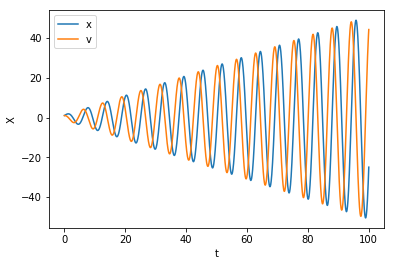

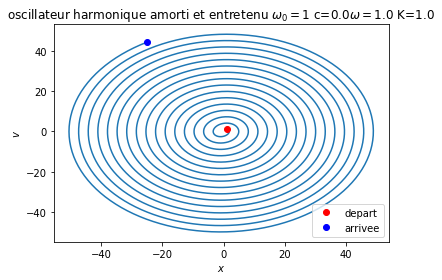

In [52]:
# Fixer les parametres
t_      = np.linspace(0,100,2000)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = 0.
K       = 1.
omega   = 1.

# Calculer les positions et les vitesses
sol=[resonnance(t,omega,x_0,v_0,K) for t in t_]
x_=[s[0] for s in sol]
v_=[s[1] for s in sol]

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrivee')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti et entretenu $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

### Question 6: l'int√©grateur odeint

Dans ce TP on s'int√©resse √† des ODE dont on peut calculer explicitement la solution, mais √ßa ne sera pas toujours le cas. Et m√™me, on n'est pas √† labri d'une erreur de calcul de la dite solution ou d'une erreur de programmation.
Le parachute c'est le "solveur" d'√©quations diff√©rentielles odeint de la librairie scipy.integrate, qui va calculer une solution num√©rique de notre √©quation diff√©rentielle en utilisant la m√©thode num√©rique la plus adapt√©e (en gros, les auteurs de la librairie ont suivi avec succ√®s une version avanc√©e de l'UE 3M326) 

Si vous lisez la documentation scipy de ce solveur, vous trouverez la syntaxe suivante :

$$scipy.integrate.odeint(func,y0,t,args=(),Dfun=None,col\_deriv=0,full\_output=0,mi=None,mu=None,rtol=None,atol=None,tcrit=None,h0=0.0,hmax=0.0,hmin=0.0,ixpr=0,mxstep=0,mxhnil=0,mxordn=12,mxords=5,printmessg=0)$$

En effet, la fonction odeint accepte de nombreux arguments optionnels, qui ne sont pas obligatoires pour une utilisation de base et dont on ne s'occupera pas ici. 
Pour utiliser avec succ√®s leur librairie, il faut
<UL>
<li> mettre son probl√®me de Cauchy sous la forme (pas si) canonique (que √ßa)
$$\left\{\begin{array}{l}Y'(t)=F(Y(t),t,p)\\
 Y(t_0) = Y_0\end{array}\right.
 $$
<li> identifier et programmer la fonction $F(Y,t,p)$ o√π $p$ est un tupple contenant les param√®tres √©ventuels. Attention de respecter l'ordre des arguments, qui n'est pas celui du cours.
<li> d√©finir t\_0, Y\_0, la liste t\_ des temps discrets o√π on veut calculer la solution, et les param√®tres √©ventuels
<li> appeler le solveur odeint
</UL>
L'exemple simple
$$\left\{\begin{array}{l}Y'(t)=AY(t), \quad\mbox{avec } A=\begin{pmatrix}-2&1\cr 1 &-4\end{pmatrix}\\
 Y(0) = (2,1)^T\end{array}\right.
 $$
est trait√© ci-dessous


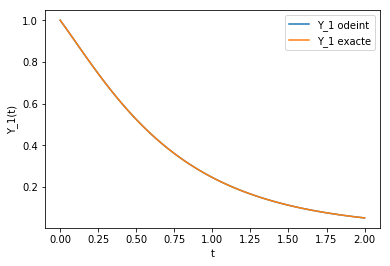

In [53]:
A =np.array([[-2.,1.], [1.,-4.]]) # la matrice
#La fonction second membre en respectant l'ordre des arguments
def second_membre(Y,t,A):
    Z=A.dot(Y)
    return Z
def sol_exacte(Y0,t,A):
    Am=np.matrix(A)
    Z=scipy.linalg.expm(Am*t).dot(Y0)
    return Z
 
Y0 =np.array([1.,1.]) # la condition initiale
t_ =np.linspace(0,2.,100)

Y=scipy.integrate.odeint(second_membre, Y0, t_,args=(A,))
Ye=[sol_exacte(Y0,t,A) for t in t_] #vecteur de la solution exacte sur le vecteur discretis√© t_
x_=[] 
xe_=[]
for y,ye in zip(Y,Ye):
    x_.append(y[0])
    xe_.append(ye[0])
    
plt.plot(t_,x_,label='Y_1 odeint')
plt.plot(t_,xe_,label='Y_1 exacte')
plt.xlabel('t')
plt.ylabel('Y_1(t)')
plt.legend()
plt.show()

Deux remarques importantes:
<OL><LI>
Lisez attentivement l'exemple ci-dessus et remarquez bien la mani√®re dont on calcule les produits matrice x vecteur.
Si la matrice et le vecteur sont tous les deux des objets de type numpy.matrix, l'op√©ration * effectue bien le produit math√©matique matrice x vecteur. Si l'un des deux termes est un simple numpy.array (comme ci-dessus), il faut utiliser la commande numpy.dot pour faire une multiplication alg√©brique. l'op√©rateur * sur les objets numpy.array effectue la multiplication "composante par composante" si elle a un sens.
<LI> le solveur odeint peut manipuler des listes et des tableaux √† une seule dimension seulement.
</OL>

V√©rifier la solution calcul√©e par oscillateur\_aten\_force √† l‚Äôaide de l‚Äôint√©grateur odeint

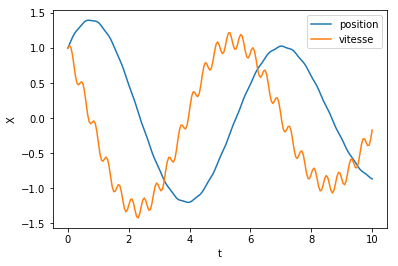

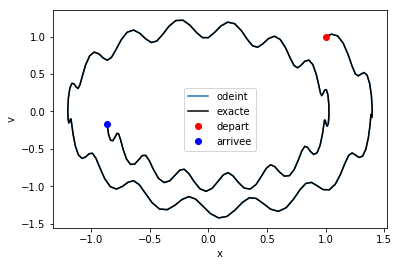

In [54]:
#votre solution ci-dessous
def ode_oscillateur_aten_force(X,t,omega_0,c,omega,K):
    x = X[0]
    v = X[1]
    dx = v
    dv = -x*omega_0**2-c*v+K*math.cos(omega*t)
    return [dx,dv]

# Condition initiale
X_0     = np.array([1.,1.])
t_      = np.linspace(0,10,200)
omega_0 = 1
c       = .1
omega   = 5*math.pi
K       = 2

# Calcule avec le solveur
sol = scipy.integrate.odeint(ode_oscillateur_aten_force, X_0, t_, args=(omega_0,c,omega,K))

x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,sol[:, 0],label='position')
plt.plot(t_,sol[:, 1],label='vitesse')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()
plt.draw()

plt.figure(2)
plt.plot(sol[:,0],sol[:,1],label='odeint')
plt.plot(x_,v_,'k',label='exacte')
plt.xlabel('x')
plt.ylabel('v')
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrivee')
plt.legend()
plt.show()